In [1]:
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
%matplotlib notebook

### Model

In [2]:
from scipy.integrate import quad

ys = np.linspace(-6.375, 6.375, 1000)[:, np.newaxis]
zs = np.linspace(-25.5, 25.5, 1000)[np.newaxis, :]

def gaus2d(y, z, sigmay, sigmaz):
    return np.exp(- (((y ** 2) / (2 * (sigmay ** 2))) + ((z ** 2) / (2 * (sigmaz ** 2)))))

def boundary(theta, r):
    return r - r * np.cos(theta), r * np.sin(theta)

def mem_profile(sigmay, sigmaz, r, width, n):
    res = np.zeros([n])
    yvals = np.linspace(-width / 2, width / 2, n)
    for i, y in enumerate(yvals):
        res[i] = quad(lambda theta: gaus2d(y - r + r * np.cos(theta), r * np.sin(theta), sigmay, sigmaz), 
                      -np.pi, np.pi)[0]
    return yvals, res

### Panel figure - top panel

In [3]:
def ground_truth_fig(ax, r):
    ax.plot(*boundary(np.linspace(-np.pi, np.pi, 1000), r=r), c='w')
    ax.axhline(0, c='r', linestyle='--')
    ax.set_xlim(-6.375, 6.375)
    ax.set_ylim(-25.5, 25.5)
    ax.set_aspect('equal')
    ax.set_facecolor('k')
    ax.tick_params(axis='both', labelsize=8)
    
def psf_fig(ax, sigmaz, sigmay):
    ys = np.linspace(-6.375, 6.375, 1000)[:, np.newaxis]
    zs = np.linspace(-25.5, 25.5, 1000)[np.newaxis, :]
    ax.imshow(gaus2d(ys, zs, sigmay=sigmay, sigmaz=sigmaz).T, origin='lower', extent=[-6.375, 6.375, -25.5, 25.5], 
               aspect='equal', cmap='gray')
    ax.tick_params(axis='both', labelsize=8)

<IPython.core.display.Javascript object>


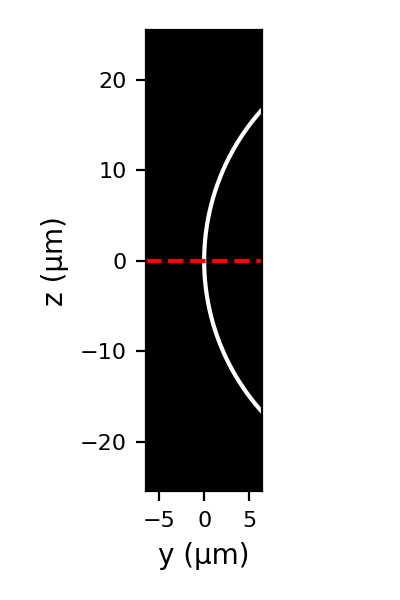

In [4]:
fig, ax = plt.subplots()
ground_truth_fig(ax, 25)
ax.set_xlabel('y (μm)')
ax.set_ylabel('z (μm)')
fig.set_size_inches(2, 3)
fig.tight_layout()
fig.savefig('Figs_mem_bleedthrough/a1.png', dpi=600, transparent=False)

<IPython.core.display.Javascript object>


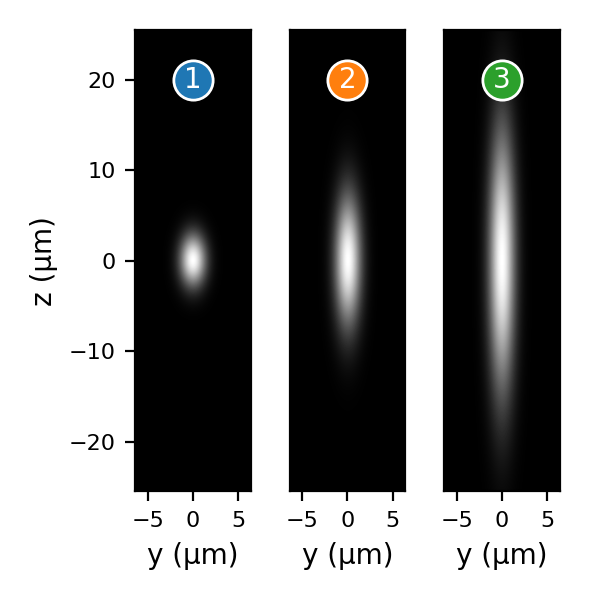

In [26]:
fig, ax = plt.subplots(1, 3)
psf_fig(ax[0], 2, 1)
psf_fig(ax[1], 5, 1)
psf_fig(ax[2], 10, 1)

ax[0].scatter(0, 20, c='tab:blue', s=200, edgecolors='w')
ax[1].scatter(0, 20, c='tab:orange', s=200, edgecolors='w')
ax[2].scatter(0, 20, c='tab:green', s=200, edgecolors='w')
ax[0].text(0, 20, '1', ha='center', va='center', c='w')
ax[1].text(0, 20, '2', ha='center', va='center', c='w')
ax[2].text(0, 20, '3', ha='center', va='center', c='w')

ax[1].set_yticks([])
ax[2].set_yticks([])
[a.set_xlabel('y (μm)') for a in ax]
ax[0].set_ylabel('z (μm)')
fig.set_size_inches(3, 3)
fig.tight_layout()
fig.savefig('Figs_mem_bleedthrough/a2.png', dpi=600, transparent=True)

<IPython.core.display.Javascript object>


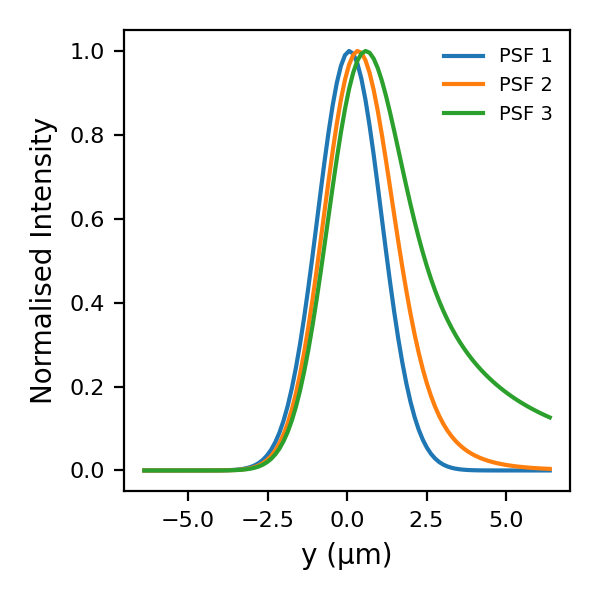

In [30]:
fig, ax = plt.subplots()

profile_x1, profile_y1 = mem_profile(1, 2, r=25, width=12.75, n=100)
profile_x2, profile_y2 = mem_profile(1, 5, r=25, width=12.75, n=100)
profile_x3, profile_y3 = mem_profile(1, 10, r=25, width=12.75, n=100)

ax.plot(profile_x1, profile_y1 / max(profile_y1), label='PSF 1')
ax.plot(profile_x2, profile_y2 / max(profile_y2), label='PSF 2')
ax.plot(profile_x3, profile_y3 / max(profile_y3), label='PSF 3')

ax.legend(frameon=False, fontsize=7)

ax.set_xlabel('y (μm)')
ax.set_ylabel('Normalised Intensity')
ax.tick_params(axis='both', labelsize=8)
fig.set_size_inches(3, 3)
fig.tight_layout()
fig.savefig('Figs_mem_bleedthrough/a3.png', dpi=600, transparent=True)

### Panel figure - bottom panel

<IPython.core.display.Javascript object>


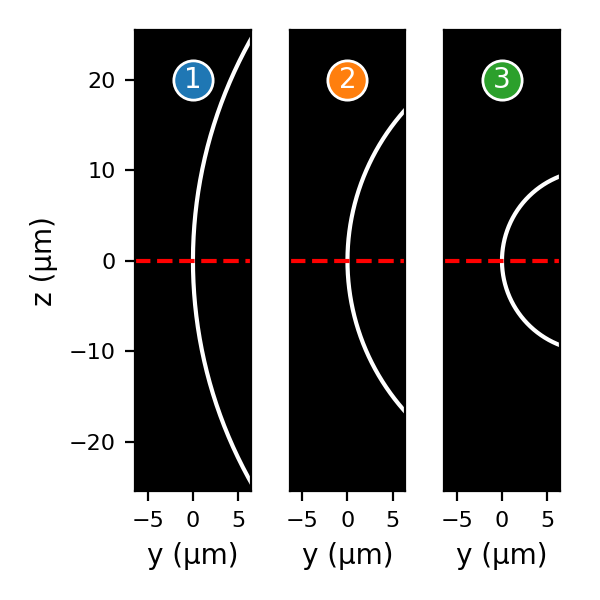

In [27]:
fig, ax = plt.subplots(1, 3)
ground_truth_fig(ax[0], 50)
ground_truth_fig(ax[1], 25)
ground_truth_fig(ax[2], 10)

ax[0].scatter(0, 20, c='tab:blue', s=200, edgecolors='w')
ax[1].scatter(0, 20, c='tab:orange', s=200, edgecolors='w')
ax[2].scatter(0, 20, c='tab:green', s=200, edgecolors='w')
ax[0].text(0, 20, '1', ha='center', va='center', c='w')
ax[1].text(0, 20, '2', ha='center', va='center', c='w')
ax[2].text(0, 20, '3', ha='center', va='center', c='w')

ax[1].set_yticks([])
ax[2].set_yticks([])
[a.set_xlabel('y (μm)') for a in ax]
ax[0].set_ylabel('z (μm)')
fig.set_size_inches(3, 3)
fig.tight_layout()
fig.savefig('Figs_mem_bleedthrough/b1.png', dpi=600, transparent=False)

<IPython.core.display.Javascript object>


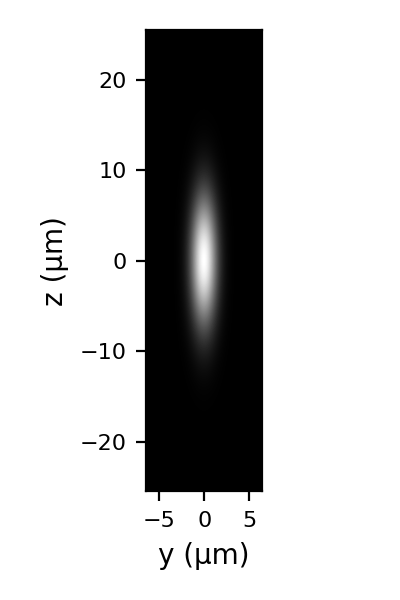

In [8]:
fig, ax = plt.subplots()
psf_fig(ax, 5, 1)
ax.set_xlabel('y (μm)')
ax.set_ylabel('z (μm)')
fig.set_size_inches(2, 3)
fig.tight_layout()
fig.savefig('Figs_mem_bleedthrough/b2.png', dpi=600, transparent=True)

<IPython.core.display.Javascript object>


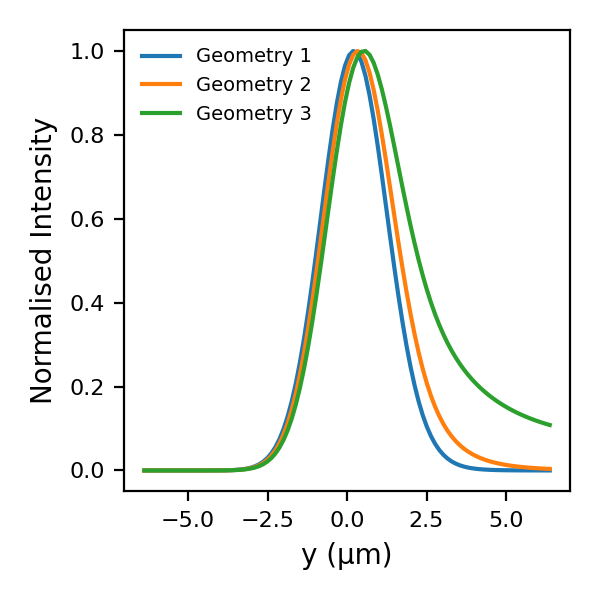

In [29]:
fig, ax = plt.subplots()

profile_x1, profile_y1 = mem_profile(1, 5, r=50, width=12.75, n=100)
profile_x2, profile_y2 = mem_profile(1, 5, r=25, width=12.75, n=100)
profile_x3, profile_y3 = mem_profile(1, 5, r=10, width=12.75, n=100)

ax.plot(profile_x1, profile_y1 / max(profile_y1), label='Geometry 1')
ax.plot(profile_x2, profile_y2 / max(profile_y2), label='Geometry 2')
ax.plot(profile_x3, profile_y3 / max(profile_y3), label='Geometry 3')

ax.legend(frameon=False, fontsize=7)

ax.set_xlabel('y (μm)')
ax.set_ylabel('Normalised Intensity')
ax.tick_params(axis='both', labelsize=8)
fig.set_size_inches(3, 3)
fig.tight_layout()
fig.savefig('Figs_mem_bleedthrough/b3.png', dpi=600, transparent=True)